In [7]:
import mplfinance as mpf
import pandas as pd

In [8]:
# * Get data from Stooq
data = pd.read_csv(
    "https://stooq.com/q/d/l/?s=btc.v&d1=20220101&d2=20221231&i=d",
    index_col=0,
    parse_dates=True,
)
data.index.name = "Date"
data.shape
data.head(3)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-27,16835.88,16963.27,16595.37,16684.11,401540.444105
2022-12-28,16684.39,16776.92,16462.90,16509.22,425157.396589
2022-12-29,16509.74,16656.78,16481.69,16612.53,357213.756009
2022-12-30,16611.74,16657.16,16329.44,16575.22,357984.697393
2022-12-31,16575.09,16631.16,16467.18,16512.62,246072.611740


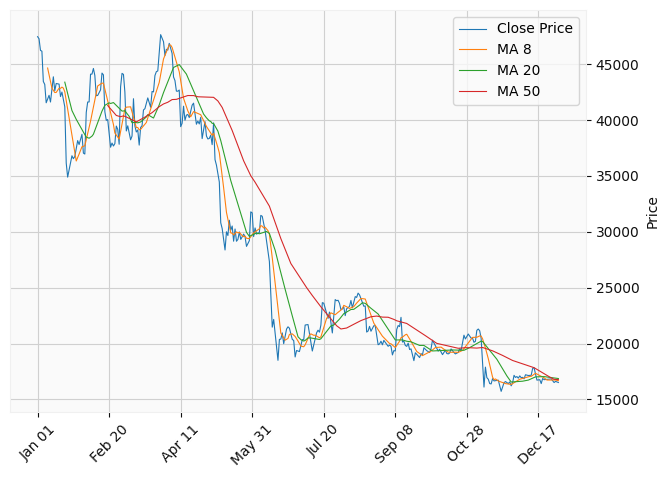

In [9]:
_, axes = mpf.plot(
    data, type="line", style="yahoo", mav=(8, 20, 50), returnfig=True
)

axes[0].legend([None] * 5)
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles, labels=list(["Close Price", "MA 8", "MA 20", "MA 50"]))